# Cloud-induced radiative flux in resposne to abrupt 4xCO2 in CMIP5 models at the top-of-atmosphere, the surface and vertically-integrated inside the atmosphere

This notebook reproduces Figure 6.

Data obtained from Paulo Ceppi.

### Load libraries

In [1]:
import xarray as xr
import numpy as np
import glob as glob
import matplotlib.pyplot as plt

### Load data

Construct list of model names from data files:

In [2]:
# list of files; note that the list is not sorted by file name, i.e. assume it is unsorted
filelist = glob.glob('../../data/climatechange/cloud_feedback_*.nc')

# create list of model names
modlist = []
for m in range(0, len(filelist)):
    # model name
    modname = filelist[m].split('_')[2]
    modlist.append(modname)
    
# number of models
nmod = len(modlist)

In [3]:
def load_cmip5_cloudfeedback(model):
    ds = xr.load_dataset('../../data/climatechange/cloud_feedback_'+model+'_abrupt4xCO2.nc').squeeze()
    return ds

dslist = []
for m in modlist:
    dslist.append(load_cmip5_cloudfeedback(m))

Compute multi-model mean and for simplicity store in normal numpy arrays, luckily all models have been interpolated to the same latitude grid already:

In [4]:
def make_modelmean(dslist, var):
    vararray = np.zeros([len(dslist), 64]) + np.nan
    for m in range(len(dslist)):
        vararray[m,:] = dslist[m][var].values.squeeze()
    return np.nanmean(vararray, axis=0).squeeze()

sw_toa_mm = make_modelmean(dslist, 'sw_toa')
lw_toa_mm = make_modelmean(dslist, 'lw_toa')
sw_sfc_mm = make_modelmean(dslist, 'sw_sfc')
lw_sfc_mm = make_modelmean(dslist, 'lw_sfc')

## Plotting

Helper function for a nice plot:

In [5]:
def make_niceplot():
    # adjust spines
    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_color('none')
    #ax.spines['bottom'].set_position('bottom')
    plt.xticks([-60,-40,-20,0,20,40,60,80],['60S', '40S', '20S', 'Eq', '20N', '40N', '60N', '80N'], fontsize=10)
    ax.xaxis.set_ticks_position('bottom')
    plt.plot([-80,80],[0,0],'k',linewidth=0.5)

Latitude array:

In [6]:
lat = dslist[0]['lat'].values

Net cloud change of models as spaghetti lines, multi-model mean as thick lines for net, sw and lw:

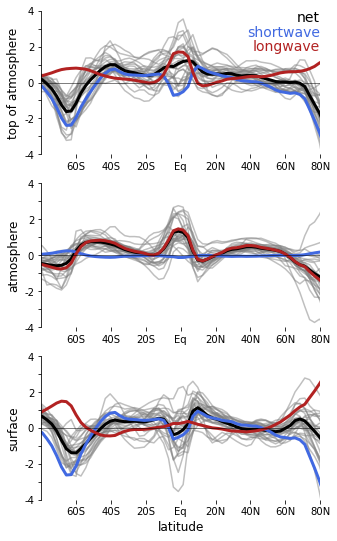

In [7]:
plt.figure(figsize=(5,9))

plt.subplot(3,1,1)
for m in range(nmod):
    plt.plot(lat, dslist[m]['sw_toa']+dslist[m]['lw_toa'], 'gray', alpha=0.5)
plt.plot(lat, sw_toa_mm+lw_toa_mm, 'black', linewidth=3)
plt.plot(lat, sw_toa_mm, 'royalblue', linewidth=3)
plt.plot(lat, lw_toa_mm, 'firebrick', linewidth=3)
plt.yticks([-4,-3,-2,-1,0,1,2,3,4], ['-4','','-2','','0','','2','','4'], fontsize=10)
plt.xlim(-80,80); plt.ylim(-4,4);
make_niceplot()
plt.ylabel('top of atmosphere', fontsize=12);
plt.text(80,4.0, 'net', color='k', size=14, ha='right', va='top')
plt.text(80,3.2, 'shortwave', color='royalblue', size=14, ha='right', va='top')
plt.text(80,2.4, 'longwave', color='firebrick', size=14, ha='right', va='top')

plt.subplot(3,1,2)
for m in range(nmod):
    plt.plot(dslist[m]['lat'], (dslist[m]['sw_toa']+dslist[m]['lw_toa']) - 
                               (dslist[m]['sw_sfc']+dslist[m]['lw_sfc']), 'gray', alpha=0.5)
plt.plot(lat, (sw_toa_mm+lw_toa_mm) - (sw_sfc_mm+lw_sfc_mm), 'black', linewidth=3)
plt.plot(lat, sw_toa_mm - sw_sfc_mm, 'royalblue', linewidth=3)
plt.plot(lat, lw_toa_mm - lw_sfc_mm, 'firebrick', linewidth=3)
plt.yticks([-4,-3,-2,-1,0,1,2,3,4], ['-4','','-2','','0','','2','','4'], fontsize=10)
plt.xlim(-80,80); plt.ylim(-4.0,4.0);
make_niceplot()
plt.ylabel('atmosphere', fontsize=12);

plt.subplot(3,1,3)
for m in range(nmod):
    plt.plot(dslist[m]['lat'], dslist[m]['sw_sfc']+dslist[m]['lw_sfc'], 'gray', alpha=0.5)
plt.plot(lat, sw_sfc_mm+lw_sfc_mm, 'black', linewidth=3)
plt.plot(lat, sw_sfc_mm, 'royalblue', linewidth=3)
plt.plot(lat, lw_sfc_mm, 'firebrick', linewidth=3)
plt.xlim(-80,80); plt.ylim(-4,4)
plt.yticks([-4,-3,-2,-1,0,1,2,3,4], ['-4','','-2','','0','','2','','4'], fontsize=10)
make_niceplot()
plt.ylabel('surface', fontsize=12);
plt.xlabel('latitude', fontsize=12)

plt.savefig('./figure-6.pdf')

For reference, also plot sw and lw cloud change individually as red and blue spaghetti lines, and the model-mean in thick:

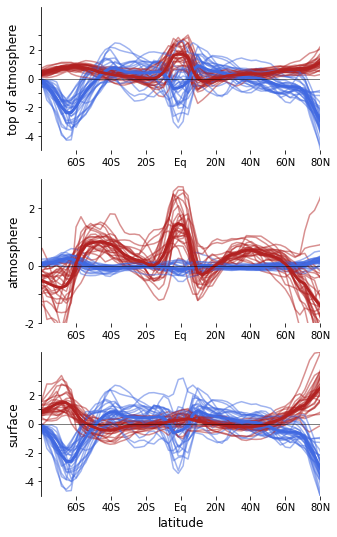

In [8]:
plt.figure(figsize=(5,9))

plt.subplot(3,1,1)
for m in range(nmod):
    plt.plot(lat, dslist[m]['sw_toa'], 'royalblue', alpha=0.5)
    plt.plot(lat, dslist[m]['lw_toa'], 'firebrick', alpha=0.5)
plt.plot(lat, sw_toa_mm, 'royalblue', linewidth=3)
plt.plot(lat, lw_toa_mm, 'firebrick', linewidth=3)
plt.xlim(-80,80); plt.ylim(-5,5);
plt.yticks([-4,-3,-2,-1,0,1,2,3], ['-4','','-2','','0','','2','','4'], fontsize=10)
make_niceplot()
plt.ylabel('top of atmosphere', fontsize=12);

plt.subplot(3,1,2)
for m in range(nmod):
    plt.plot(dslist[m]['lat'], (dslist[m]['sw_toa']) - 
                               (dslist[m]['sw_sfc']), 'royalblue', alpha=0.5)
    plt.plot(dslist[m]['lat'], (dslist[m]['lw_toa']) - 
                               (dslist[m]['lw_sfc']), 'firebrick', alpha=0.5)
plt.plot(lat, sw_toa_mm - sw_sfc_mm, 'royalblue', linewidth=3)
plt.plot(lat, lw_toa_mm - lw_sfc_mm, 'firebrick', linewidth=3)
plt.yticks([-4,-3,-2,-1,0,1,2], ['-4','','-2','','0','','2','','4'], fontsize=10)
plt.xlim(-80,80); plt.ylim(-2,3)
make_niceplot()
plt.ylabel('atmosphere', fontsize=12);

plt.subplot(3,1,3)
for m in range(nmod):
    plt.plot(lat, dslist[m]['sw_sfc'], 'royalblue', alpha=0.5)
    plt.plot(lat, dslist[m]['lw_sfc'], 'firebrick', alpha=0.5)
plt.plot(lat, sw_sfc_mm, 'royalblue', linewidth=3)
plt.plot(lat, lw_sfc_mm, 'firebrick', linewidth=3)
plt.xlim(-80,80); plt.ylim(-5,5);
plt.yticks([-4,-3,-2,-1,0,1,2,3], ['-4','','-2','','0','','2','','4'], fontsize=10)
make_niceplot()
plt.ylabel('surface', fontsize=12);
plt.xlabel('latitude', fontsize=12)

plt.savefig('./figure-6_sw-and-lw-separately.pdf')